## Classification of Medical Images Using Neural Networks

In this project, we'll implement and compare various classifier models using supervised learning to classify medical images. We'll be working with the BloodMNIST dataset, which is part of the MedMNIST collection of health-related image datasets.

### Dataset Overview
- The dataset contains 28x28 RGB images
- Images are not normalized
- Data is pre-split into training, validation, and test sets

### Project Objectives
1. Implement at least 4 different classifier architectures
   - Possible models include logistic regression, fully-connected networks, and other suitable architectures
   - Aim for a variety of approaches (e.g., different layer combinations rather than just changing activation functions)

2. Train the models and optimize their hyperparameters

3. Compare the performance of the different architectures
   - Plot accuracy and error/loss on separate graphs
   - Analyze and discuss the results

### Implementation Steps
1. Download and load the BloodMNIST dataset
2. Preprocess the data as necessary
3. Design and implement the chosen classifier architectures
4. Train the models and optimize their parameters
5. Evaluate and compare the performance of the models
6. Visualize the results and discuss findings

Let's begin by loading the dataset and exploring its structure.

In [2]:
import numpy as np
import urllib.request
import os

# Download the dataset to the local folder
if not os.path.isfile('./bloodmnist.npz'):
    urllib.request.urlretrieve('https://zenodo.org/record/6496656/files/bloodmnist.npz?download=1', 'data/bloodmnist.npz')

# Load the compressed numpy array file
dataset = np.load('data/bloodmnist.npz')

# The loaded dataset contains each array internally
for key in dataset.keys():
    print(key, dataset[key].shape, dataset[key].dtype)

train_images (11959, 28, 28, 3) uint8
train_labels (11959, 1) uint8
val_images (1712, 28, 28, 3) uint8
val_labels (1712, 1) uint8
test_images (3421, 28, 28, 3) uint8
test_labels (3421, 1) uint8


In [2]:
print(dataset['train_images'].shape)

(11959, 28, 28, 3)


In [3]:
# Checking the number of classes in the dataset
num_classes = len(np.unique(dataset['train_labels']))
print("Number of Classes:", num_classes)

Number of Classes: 8


### Implementation and Training of Classifier Models

Now that we've outlined our chosen classifier architectures, let's proceed with implementing and training these models. Our approach will include:

1. Model Implementation
   - Implement each of the four chosen architectures:
     - Logistic Regression
     - Convolutional Neural Network (CNN)
     - Multi-Layer Perceptron (MLP)
     - Transfer Learning model (using a pre-trained CNN)

2. Training Process
   - Train each model using the prepared dataset
   - Use Adam optimizer and cross-entropy loss as mentioned
   - Implement early stopping or other regularization techniques as needed

3. Hyperparameter Optimization
   - Use techniques like grid search or random search to find optimal hyperparameters for each model
   - Consider parameters such as learning rate, batch size, number of layers/neurons, etc.

4. Model Evaluation
   - Evaluate each model's performance on the validation set
   - Track metrics such as accuracy, loss, and potentially others (e.g., F1-score, confusion matrix)

Let's start by implementing these steps and training our models. We'll then move on to comparing their performance and visualizing the results.

In [14]:
import numpy as np
import urllib.request
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [7]:
# Separate the dataset into features (X) and labels (y)
X_train = dataset['train_images']
y_train = dataset['train_labels'].squeeze()  # Remove unnecessary dimensions
X_val = dataset['val_images']
y_val = dataset['val_labels'].squeeze()
X_test = dataset['test_images']
y_test = dataset['test_labels'].squeeze()

# Reshape the images to (num_samples, 28*28*3)
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [11]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the model with increased max_iter
logistic_regression = LogisticRegression(max_iter=5000)
logistic_regression.fit(X_train_scaled, y_train)

# Evaluate
y_pred_lr = logistic_regression.predict(X_val_scaled)
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.8066588785046729


Epoch 1/60, Train Acc: 0.5021, Val Acc: 0.6174
Epoch 2/60, Train Acc: 0.6425, Val Acc: 0.6694
Epoch 3/60, Train Acc: 0.6624, Val Acc: 0.7366
Epoch 4/60, Train Acc: 0.6812, Val Acc: 0.7325
Epoch 5/60, Train Acc: 0.6920, Val Acc: 0.7208
Epoch 6/60, Train Acc: 0.7106, Val Acc: 0.7593
Epoch 7/60, Train Acc: 0.7172, Val Acc: 0.7564
Epoch 8/60, Train Acc: 0.7284, Val Acc: 0.7535
Epoch 9/60, Train Acc: 0.7278, Val Acc: 0.7342
Epoch 10/60, Train Acc: 0.7315, Val Acc: 0.7804
Epoch 11/60, Train Acc: 0.7407, Val Acc: 0.7675
Epoch 12/60, Train Acc: 0.7453, Val Acc: 0.7634
Epoch 13/60, Train Acc: 0.7517, Val Acc: 0.7880
Epoch 14/60, Train Acc: 0.7486, Val Acc: 0.7488
Epoch 15/60, Train Acc: 0.7469, Val Acc: 0.8107
Epoch 16/60, Train Acc: 0.7562, Val Acc: 0.7944
Epoch 17/60, Train Acc: 0.7495, Val Acc: 0.7926
Epoch 18/60, Train Acc: 0.7575, Val Acc: 0.7681
Epoch 19/60, Train Acc: 0.7653, Val Acc: 0.8125
Epoch 20/60, Train Acc: 0.7692, Val Acc: 0.7845
Epoch 21/60, Train Acc: 0.7706, Val Acc: 0.8102
E

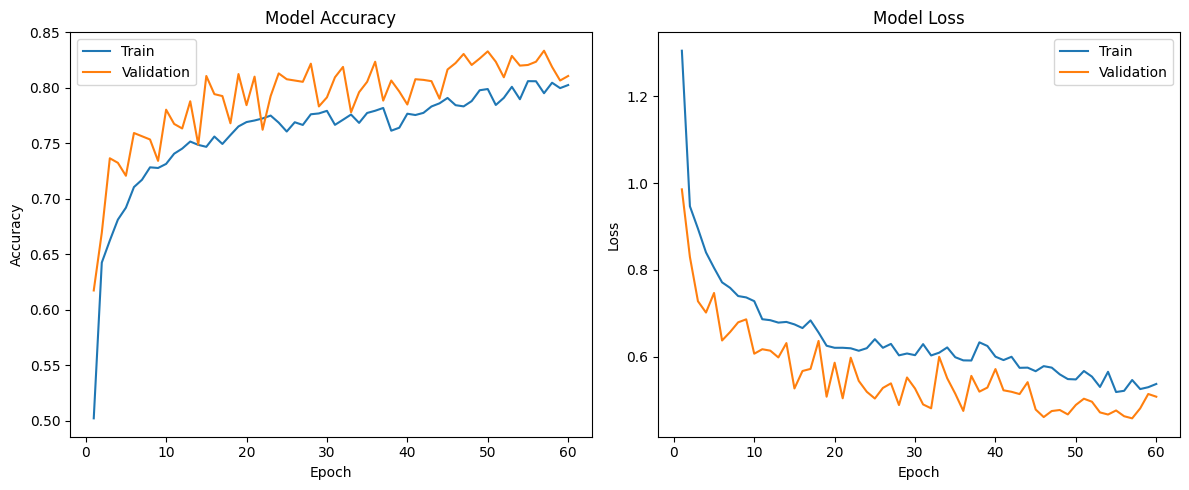

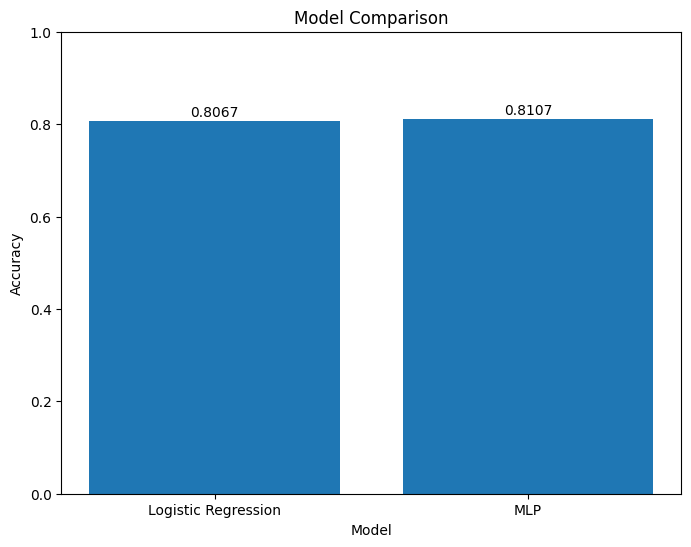

In [16]:
# 2. Multi-Layer Perceptron (MLP) using PyTorch

# Convert data to PyTorch tensors and normalize
X_train_tensor = torch.Tensor(X_train) / 255.0  # Normalize pixel values
y_train_tensor = torch.LongTensor(y_train)
X_val_tensor = torch.Tensor(X_val) / 255.0  # Normalize pixel values
y_val_tensor = torch.LongTensor(y_val)

# Create a DataLoader for training and validation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

batch_size = 64  # Adjusted batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

input_size = 28 * 28 * 3
hidden_size1 = 512
hidden_size2 = 256
output_size_mlp = 8  # Number of classes
mlp_model = MLP(input_size, hidden_size1, hidden_size2, output_size_mlp)

# Adjust learning rate and optimizer
criterion_mlp = nn.CrossEntropyLoss()
optimizer_mlp = optim.Adam(mlp_model.parameters(), lr=0.001, weight_decay=1e-5)

# Lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

num_epochs_mlp = 60
for epoch in range(num_epochs_mlp):
    mlp_model.train()
    for inputs, labels in train_loader:
        optimizer_mlp.zero_grad()
        outputs_mlp = mlp_model(inputs.view(inputs.size(0), -1))
        loss_mlp = criterion_mlp(outputs_mlp, labels)
        loss_mlp.backward()
        optimizer_mlp.step()
    
    # Evaluate after each epoch
    mlp_model.eval()
    with torch.no_grad():
        val_loss = 0
        correct = 0
        total = 0
        for inputs, labels in val_loader:
            outputs_mlp = mlp_model(inputs.view(inputs.size(0), -1))
            val_loss += criterion_mlp(outputs_mlp, labels).item()
            _, predicted = outputs_mlp.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
    accuracy_mlp_pytorch = correct / total
    print(f"Epoch {epoch+1}/{num_epochs_mlp}, Validation Accuracy: {accuracy_mlp_pytorch:.4f}")

print("Final MLP (PyTorch) Accuracy:", val_accuracies[-1])

# Plotting
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs_mlp + 1), train_accuracies, label='Train')
plt.plot(range(1, num_epochs_mlp + 1), val_accuracies, label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs_mlp + 1), train_losses, label='Train')
plt.plot(range(1, num_epochs_mlp + 1), val_losses, label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Comparison of final accuracies
models = ['Logistic Regression', 'MLP']
accuracies = [accuracy_lr, val_accuracies[-1]]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

Both Logistic Regression and MLP models performed well on the BloodMNIST dataset, achieving accuracies above 80%. The MLP (81.07%) slightly outperformed Logistic Regression (80.67%), indicating some benefit from capturing non-linear relationships in the data.

The MLP's learning curves show rapid initial improvement and stable performance, with close alignment between training and validation metrics suggesting good generalization. The small performance gap between the models implies that the dataset has strong linear separability, but there are some patterns that benefit from the MLP's non-linear capabilities.
Overall, while the MLP showed a slight advantage, the strong performance of Logistic Regression suggests that simpler models can be effective for this task. The results indicate that the classification problem is relatively straightforward, with limited room for improvement through increased model complexity alone.